# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [13]:
# Importando a biblioteca seaborn e geralmente usada como sns
import seaborn as sns

# Carregando o conjunto de dados 'tips' dos conjuntos de dados embutidos do seaborn
tips = sns.load_dataset("tips")

# Criando uma nova coluna 'tip_pct' que representa a porcentagem da gorjeta em relação à conta total
# Calculado dividindo a coluna 'tip' pela diferença entre 'total_bill' e 'tip'
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando uma nova coluna 'net_bill' que representa o valor líquido da conta
# Calculado subtraindo a coluna 'tip' da coluna 'total_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Exibindo as primeiras linhas do DataFrame 'tips' modificado
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [14]:
# Filtrando o DataFrame 'tips' com base em uma condição na coluna 'tip_pct'
# Selecionando apenas as linhas onde a porcentagem da gorjeta é inferior a 0.5

# Quebrando a sintaxe:
# - tips['tip_pct'] < 0.5: Cria uma máscara booleana, True para as linhas em que 'tip_pct' é inferior a 0.5
# - tips[...]: Indexa o DataFrame usando a máscara booleana para selecionar apenas as linhas que atendem à condição

# Atualizando o DataFrame 'tips' com as linhas filtradas
tips = tips[tips['tip_pct'] < 0.5]

In [15]:
# Criando um modelo de regressão linear usando a biblioteca statsmodels (smf)
# A variável dependente é 'tip', e a variável independente é 'net_bill'
# Ajustando o modelo aos dados do DataFrame 'tips'
reg1 = smf.ols("tip ~ net_bill", data=tips).fit()

# Extraindo e exibindo os parâmetros estimados do modelo
reg1.params

Intercept    1.221901
net_bill     0.104373
dtype: float64

<Axes: xlabel='net_bill', ylabel='tip'>

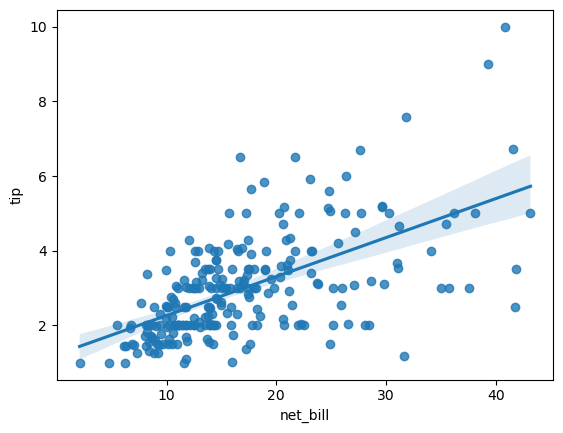

In [16]:
# Criando um gráfico de dispersão com uma linha de regressão usando seaborn
# A variável independente (eixo x) é 'net_bill', e a variável dependente (eixo y) é 'tip'

# Sintaxe corrigida: sns.regplot(data=tips, x='net_bill', y='tip')
sns.regplot(data=tips, x='net_bill', y='tip')

In [17]:
# Criando um modelo de regressão linear usando a biblioteca statsmodels (smf)
# A variável dependente é 'tip_pct', e a variável independente é 'net_bill'
# Ajustando o modelo aos dados do DataFrame 'tips'
reg2 = smf.ols("tip_pct ~ net_bill", data=tips).fit()

# Extraindo e exibindo os parâmetros estimados do modelo
reg2.params

Intercept    0.253815
net_bill    -0.003735
dtype: float64

<Axes: xlabel='net_bill', ylabel='tip_pct'>

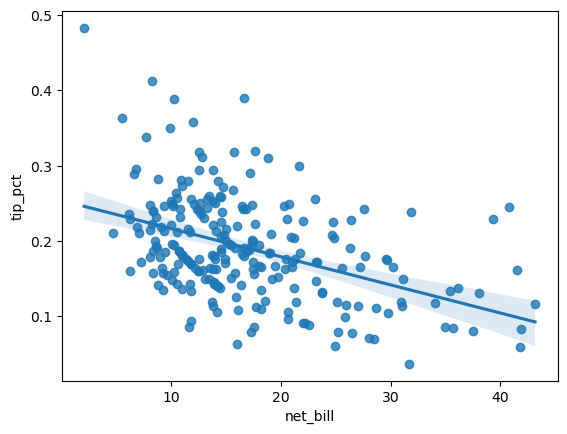

In [19]:
# Criando um gráfico de dispersão com uma linha de regressão usando seaborn
# A variável independente (eixo x) é 'net_bill' e a variável dependente (eixo y) é 'tip_pct'

# Sintaxe corrigida: sns.regplot(data=tips, x='net_bill', y='tip_pct')
sns.regplot(data=tips, x='net_bill', y='tip_pct')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

   Os gráficos revelam tendências distintas. Quando olhamos para o valor total da conta em comparação com a gorjeta, percebemos uma relação positiva. Porém, ao considerarmos o valor total da conta em relação ao percentual da gorjeta, a relação se torna negativa. Os coeficientes de determinação (R²) para essas relações podem ser encontrados na célula seguinte.

In [20]:
# Imprimindo os valores de R² para os modelos de regressão
print(f"Para o modelo com 'tip' como variável explicativa, o R² é {reg1.rsquared}")
print(f"Para o modelo com 'tip_pct' como variável explicativa, o R² é {reg2.rsquared}")

Para o modelo com 'tip' como variável explicativa, o R² é 0.3635272583333453
Para o modelo com 'tip_pct' como variável explicativa, o R² é 0.18946394629203056


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [21]:
# Calculando as previsões do modelo reg2 e armazenando em 'pred'
pred = reg2.fittedvalues

In [22]:
# Calculando a estimativa da gorjeta multiplicando 'net_bill' pelo modelo de previsões 'pred'
tip = tips["net_bill"] * pred

In [23]:
# Calculando R² manualmente para o modelo 'tip'
numerador = ((tips['tip'] - tip) ** 2).sum()
denominador = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()
r_quadrado = 1 - numerador / denominador

# Exibindo os resultados
print(f"O R² para o modelo 'tip' é {r_quadrado}")
print(f"O R² para o modelo do item 1 é {reg1.rsquared}")

O R² para o modelo 'tip' é 0.35035534322513506
O R² para o modelo do item 1 é 0.3635272583333453
